In [1]:
import tensorflow as tf
from tensorflow.keras import layers, callbacks
import numpy as np
from sklearn.metrics import mean_absolute_error
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
data = pd.read_csv('/Users/jni/Documents/PyCode_FMP/data/data_47p_1h_21f.csv')
#data=pd.read_csv('/Users/jni/Documents/PyCode_FMP/data/QingData_sbp.csv')
patient_list=data['patient_id'].unique()
#feature=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']
feature=['HrRR','HrSS','AmFS','AmSN','AmFN','AmFN_FS','AmFN_SN','TmFN','TmNF','TmFN_NF','Tm_FS','Tm_SF','Tm_SN','Tm_FQ','PAT_S','PAT_F','PAT_Q','ArFS','ArSN','ArNF','ArNF_FN']

In [3]:
# early_stopping = callbacks.EarlyStopping(
#     min_delta=0.001, # minimium amount of change to count as an improvement
#     patience=25, # how many epochs to wait before stopping
#     restore_best_weights=True,
# )
reduce_lr = callbacks.ReduceLROnPlateau(monitor='loss', patience=10, mode='auto')

1 3100033 MAE:  17.838 ME 17.837 STD:  3.558
2 3100119 MAE:  6.130 ME 5.197 STD:  5.267
3 3100198 MAE:  15.479 ME 15.479 STD:  3.801
4 3100237 MAE:  12.502 ME 12.499 STD:  4.344
5 3100240 MAE:  21.838 ME 21.838 STD:  4.645
6 3100308 MAE:  11.058 ME -11.031 STD:  5.408
7 3100331 MAE:  8.144 ME 7.479 STD:  6.198
8 3100524 MAE:  36.843 ME -36.843 STD:  11.048
9 3100757 MAE:  14.964 ME -14.964 STD:  5.071
10 3100835 MAE:  7.685 ME -7.445 STD:  7.088
11 3101159 MAE:  10.456 ME -8.298 STD:  8.420
12 3101412 MAE:  16.213 ME -16.071 STD:  9.548
13 3101488 MAE:  9.567 ME 9.311 STD:  5.603
14 3101746 MAE:  9.606 ME -9.556 STD:  6.241
15 3101827 MAE:  7.380 ME 2.352 STD:  8.455
16 3101871 MAE:  9.019 ME -9.019 STD:  1.740
17 3102026 MAE:  16.984 ME 16.984 STD:  4.510
18 3102037 MAE:  16.253 ME -14.980 STD:  9.888
19 3102049 MAE:  5.093 ME 2.146 STD:  6.041
20 3102184 MAE:  3.483 ME 0.272 STD:  5.112
21 3102282 MAE:  5.197 ME 4.755 STD:  3.296
22 3102401 MAE:  6.625 ME 3.254 STD:  7.778
23 3102602

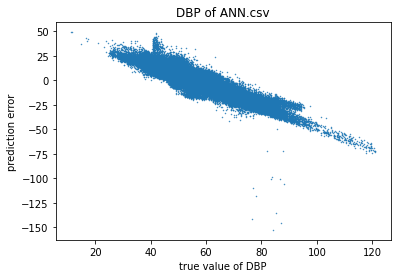

In [4]:
N=len(patient_list)

MAE=0
ME=0
STD=0
error_vector=[]
for i in range(N):
    tf.random.set_seed(i)
    
    source_data=data[data['patient_id']!=patient_list[i]]
    target_data=data[data['patient_id']==patient_list[i]]
    X_train=source_data[feature]#定义源域训练集
    y_train=source_data['DBP']
    X_test=target_data[feature]
    y_test=target_data['DBP']
    
    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    
    model = tf.keras.Sequential([
        layers.Dense(30, activation='relu', input_shape=[21]),
        layers.Dropout(0.3),
        layers.BatchNormalization(),
        layers.Dense(15, activation='relu'),
        layers.Dropout(0.3),
        layers.BatchNormalization(),
        layers.Dense(1),
    ])

    model.compile(
        optimizer='adam',
        loss='mae',
    )
    
    history = model.fit(
        X_train, y_train,
#         validation_data=(X_test, y_test),
        batch_size=250,
        epochs=100,
#         callbacks=[reduce_lr],
        verbose=0,
    )
    
#     history = model.fit(
#         X_train, y_train,
#         validation_data=(X_test, y_test),
#         batch_size=250,
#         epochs=100,
#         callbacks=[early_stopping,reduce_lr],
#         verbose=0,
#     )

    predictions_ann=model.predict(X_test) 
    predictions_ann=predictions_ann.flatten()
    
    mae=mean_absolute_error(y_test,predictions_ann)
    MAE+=mae
    error=predictions_ann-y_test
    error_vector=np.append(error_vector,error)
    me=np.mean(error)
    ME+=me
    std=np.std(error,ddof=1)
    STD+=std*(X_test.shape[0]-1)

    print(i+1,patient_list[i],'MAE: ', format(mae,'.3f'),'ME',format(me,'.3f'),'STD: ',format(std,'.3f'))

    
# prediction_error={'SBP': np.array(data['SBP']),
#                  'prediction error': error_vector}
# prediction_error=pd.DataFrame(prediction_error)
# prediction_error.to_csv('SBP ANN.ipynb.csv')###

plt.title("DBP of ANN.csv") ###
plt.xlabel("true value of DBP") #
plt.ylabel("prediction error") 
plt.scatter(np.array(data['DBP']),error_vector.transpose(),s=0.2)  #               
print('Average MAE: ', MAE/N, 'ME: ', ME/N, 'STD: ', STD/(data.shape[0]-N) )
plt.show()